In [22]:
#importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from matplotlib import pyplot
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from patsy import dmatrices
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [23]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [24]:
#Reading excel for ARIMA
df=pd.read_excel("Forecasting Assignment Data.xlsx","Sheet1",index_col=[0],parse_dates=True,squeeze=True)

In [25]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [41]:
a=df.filter(['UP'], axis=1)
# define input sequence
timeseries_data = np.array(a)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [42]:
X

array([[[313.9],
        [311.8],
        [320.7]],

       [[311.8],
        [320.7],
        [299. ]],

       [[320.7],
        [299. ],
        [286.8]],

       ...,

       [[320.1],
        [322.8],
        [331.4]],

       [[322.8],
        [331.4],
        [336.7]],

       [[331.4],
        [336.7],
        [334.6]]])

In [43]:
X.shape

(500, 3, 1)

In [44]:

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [45]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 3s 8ms/step - loss: 95905.8438
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 75761.3438
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 24476.3379
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 3680.1665
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 3101.8713
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 2753.0208
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 2425.6152
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 2251.6658
Epoch 9/50
16/16 [==============================] - 0s 7ms/step - loss: 1923.8492
Epoch 10/50
16/16 [==============================] - 0s 7ms/step - loss: 1823.6420
Epoch 11/50
16/16 [==============================] - 0s 8ms/step - loss: 1782.3826
Epoch 12/50
16/16 [==============================] - 0s 8ms/step - loss: 1982.7122
Epoch 13/5

In [46]:
from array import array

In [47]:
y_input = np.array(a[-3:])

In [48]:
a[-3:]

UP
Dates            
2020-03-12  336.7
2020-04-12  334.6
2020-05-12  287.3

In [49]:
# demonstrate prediction for next 10 days
x_input = np.array([132.1,132.1,120.4])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<90):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[364.0181]
1 month input [132.1        120.4        364.01809692]
1 month output [[414.58063]]
2 month input [120.4        364.01809692 414.58062744]
2 month output [[512.2605]]
3 month input [364.0181  414.58063 512.2605 ]
3 month output [[473.78433]]
4 month input [414.58063 512.2605  473.78433]
4 month output [[423.39175]]
5 month input [512.2605  473.78433 423.39175]
5 month output [[409.9092]]
6 month input [473.78433 423.39175 409.9092 ]
6 month output [[393.17725]]
7 month input [423.39175 409.9092  393.17725]
7 month output [[371.31635]]
8 month input [409.9092  393.17725 371.31635]
8 month output [[354.40417]]
9 month input [393.17725 371.31635 354.40417]
9 month output [[340.86295]]
10 month input [371.31635 354.40417 340.86295]
10 month output [[328.5782]]
11 month input [354.40417 340.86295 328.5782 ]
11 month output [[318.0166]]
12 month input [340.86295 328.5782  318.0166 ]
12 month output [[309.37225]]
13 month input [328.5782  318.0166  309.37225]
13 month output [[302.

In [50]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

In [51]:
len(timeseries_data)

503

In [52]:
len(lst_output)

90

In [53]:
day_new=np.arange(1,504)
day_pred=np.arange(504,594)

In [54]:
from matplotlib.pyplot import figure

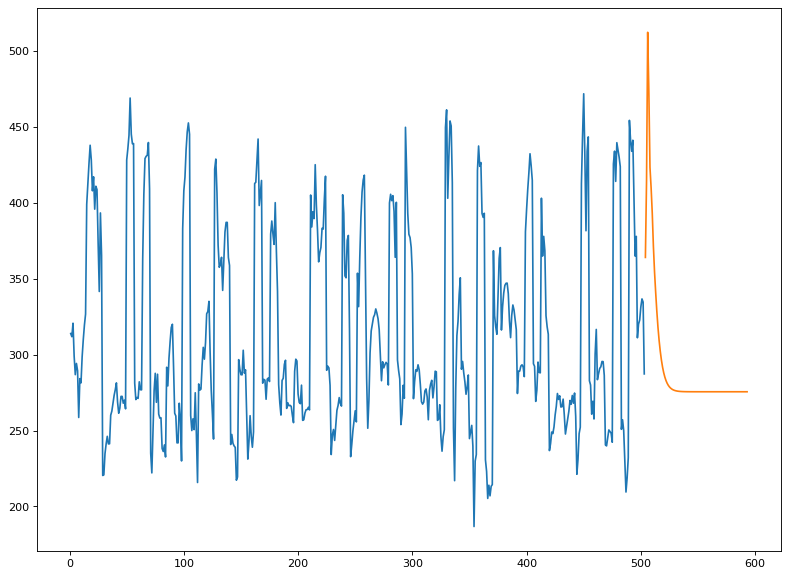

In [55]:
figure(figsize=(12, 9), dpi=80)
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)